# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings


In [4]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pip install matplotlib==3.9.2


Note: you may need to restart the kernel to use updated packages.


In [10]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [17]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df = pd.read_parquet('../self download/2023-01.parquet')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [121]:
fp = '../self download/2023-01.parquet'

# Load the Parquet file
dftest = pd.read_parquet(fp)

# Print columns and a sample of data
print("Columns:", dftest.columns.tolist())
print(dftest.head())

Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N        

In [123]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('../self download')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


for file_name in file_list:
    try:
        file_path = os.path.join(os.getcwd(), file_name)

        # Read Parquet file
        current_df = pd.read_parquet(file_path)

        # Check for datetime column
        if 'tpep_pickup_datetime' not in current_df.columns:
            print(f"'tpep_pickup_datetime' not found in {file_name}")
            continue

        # Ensure proper datetime format
        current_df['tpep_pickup_datetime'] = pd.to_datetime(current_df['tpep_pickup_datetime'], errors='coerce')

        # Extract date and hour for sampling
        current_df['date'] = current_df['tpep_pickup_datetime'].dt.date
        current_df['hour'] = current_df['tpep_pickup_datetime'].dt.hour

        sampled_data = pd.DataFrame()

        for date in current_df['date'].unique():
            date_df = current_df[current_df['date'] == date]

            for hour in range(24):
                hour_df = date_df[date_df['hour'] == hour]

                if not hour_df.empty:
                    sample = hour_df.sample(frac=0.05, random_state=1)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Append this file's sampled data to the final DataFrame
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [125]:
# Store the df in csv/parquet
df.to_parquet('finaldata1.parquet')



## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [127]:
# Load the new data file

datafile1=pd.read_parquet('finaldata1.parquet')
#os.listdir()

In [129]:
df1 = pd.DataFrame(datafile1)


In [131]:
# df.head()
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:10:20   2023-12-01 00:23:28              1.0   
1         2  2023-12-01 00:28:42   2023-12-01 00:48:46              1.0   
2         2  2023-12-01 00:16:04   2023-12-01 00:30:20              4.0   
3         1  2023-12-01 00:17:03   2023-12-01 00:30:45              NaN   
4         1  2023-12-01 00:14:37   2023-12-01 00:29:48              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.10         1.0                  N           113           263   
1           3.23         1.0                  N           209           256   
2           2.45         1.0                  N           148            90   
3           1.20         NaN               None           246           234   
4           2.70         1.0                  N           231           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        3.51           0.0   
1             1  ...      0.5        5.24           0.0   
2             1  ...      0.5        3.98           0.0   
3             0  ...      0.5        0.00           0.0   
4             1  ...      0.5        4.40           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         26.91                   2.5          0.0   
1                    1.0         31.44                   2.5          0.0   
2                    1.0         23.88                   2.5          0.0   
3                    1.0         14.00                   NaN          NaN   
4                    1.0         26.40                   2.5          0.0   

         date  hour airport_fee  
0  2023-12-01     0         NaN  
1  2023-12-01     0         NaN  
2  2023-12-01     0         NaN  
3  2023-12-01     0         NaN  
4  2023-12-01     0         NaN  

[5 rows x 22 columns]

In [133]:
# df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2107253 entries, 0 to 2107252
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [135]:
# Fix the index and drop any columns that are not needed
df1.reset_index(drop=True, inplace=True)



**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [139]:
# Combine the two airport fee columns
df1['Airport_fee'] = df1['Airport_fee'].combine_first(df1['airport_fee'])
df1.drop(columns=['airport_fee'], inplace=True)






In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2107253 entries, 0 to 2107252
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [155]:
# check where values of fare amount are negative

df[df1['fare_amount'] < 0]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
7               2  2023-12-01 00:48:55   2023-12-01 01:00:01              1.0   
305             2  2023-12-01 02:27:05   2023-12-01 02:30:22              1.0   
340             2  2023-12-01 02:06:48   2023-12-01 02:08:56              5.0   
386             2  2023-12-01 03:57:30   2023-12-01 03:57:59              1.0   
395             2  2023-12-01 03:18:00   2023-12-01 03:29:07              2.0   
...           ...                  ...                   ...              ...   
2106886         2  2023-07-31 21:23:02   2023-07-31 21:40:59              1.0   
2106964         2  2023-07-31 22:14:19   2023-07-31 22:27:15              1.0   
2107049         2  2023-07-31 22:10:05   2023-07-31 22:16:43              1.0   
2107159         2  2023-07-31 23:12:54   2023-07-31 23:21:19              2.0   
2107193         2  2023-07-31 23:42:34   2023-08-01 00:14:54              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
7                 1.80         1.0                  N            48   
305               0.58         1.0                  N            68   
340               0.65         1.0                  N            48   
386               0.01         1.0                  N            50   
395               1.50         1.0                  N           239   
...                ...         ...                ...           ...   
2106886           7.30         1.0                  N           132   
2106964           3.95         1.0                  N           138   
2107049           1.26         1.0                  N            48   
2107159           3.36         1.0                  N           132   
2107193           6.09         1.0                  N           186   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
7                 170             2  ...   -1.0     -0.5         0.0   
305                68             4  ...   -1.0     -0.5         0.0   
340                50             3  ...   -1.0     -0.5         0.0   
386                50             3  ...   -1.0     -0.5         0.0   
395               163             4  ...   -1.0     -0.5         0.0   
...               ...           ...  ...    ...      ...         ...   
2106886            63             4  ...   -1.0     -0.5         0.0   
2106964            92             4  ...   -6.0     -0.5         0.0   
2107049            68             4  ...   -1.0     -0.5         0.0   
2107159            10             4  ...   -1.0     -0.5         0.0   
2107193            42             4  ...   -1.0     -0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
7                 0.0                   -1.0        -17.10   
305               0.0                   -1.0        -10.80   
340               0.0                   -1.0        -10.10   
386               0.0                   -1.0         -8.00   
395               0.0                   -1.0        -17.10   
...               ...                    ...           ...   
2106886           0.0                   -1.0        -34.55   
2106964           0.0                   -1.0        -29.05   
2107049           0.0                   -1.0        -13.60   
2107159           0.0                   -1.0        -19.15   
2107193           0.0                   -1.0        -38.80   

         congestion_surcharge  Airport_fee        date hour  
7                        -2.5         0.00  2023-12-01    0  
305                      -2.5         0.00  2023-12-01    2  
340                      -2.5         0.00  2023-12-01    2  
386                      -2.5         0.00  2023-12-01    3  
395                      -2.5         0.00  2023-12-01    3  
...                       ...          ...         ...  ...  
2106886                   0.0        -1.75  2023-07-31   21  
2106964                   0.0        -1.75  2023-07-31   22  
2107049        

Did you notice something different in the `RatecodeID` column for above records?

In [157]:
# Analyse RatecodeID for the negative fare amounts

df[df1['fare_amount'] < 0]['RatecodeID']


7          1.0
305        1.0
340        1.0
386        1.0
395        1.0
          ... 
2106886    1.0
2106964    1.0
2107049    1.0
2107159    1.0
2107193    1.0
Name: RatecodeID, Length: 20687, dtype: float64

In [163]:
# Find which columns have negative values
negative_columns = [col for col in df1.select_dtypes(include=['number']).columns if (df1[col] < 0).any()]
print("Columns with negative values:", negative_columns)



Columns with negative values: []


In [161]:
# fix these negative values
cols_to_fix = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

df1 = df1[(df1[cols_to_fix] >= 0).all(axis=1)]



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [165]:
# Find the proportion of missing values in each column

df1.isnull().mean()

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
Airport_fee              0.0
date                     0.0
hour                     0.0
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [167]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df1[df1.isnull().any(axis=1)]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour]
Index: []

[0 rows x 21 columns]

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [169]:
# Fix missing values in 'RatecodeID'
df1['RatecodeID'].isnull().sum()


0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [171]:
# handle null values in congestion_surcharge


df1['congestion_surcharge'].fillna(df1['congestion_surcharge'].mode()[0], inplace=True)


/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/1926926318.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['congestion_surcharge'].fillna(df1['congestion_surcharge'].mode()[0], inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values

#No values missing

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [175]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Describe the dataset
print("Data Summary:\n", df1.describe(include='all'))

# Identify potential outliers using high percentiles
print("\nOutlier Check (1st to 99th percentile):\n", df1.describe(percentiles=[.01, .25, .5, .75, .99]))

# Check for unusual or out-of-place values
print("\nHigh fare amounts (> $200):", df1[df1["fare_amount"] > 200].shape[0])

print("Zero distance but positive fare:", df1[(df1["trip_distance"] == 0) & (df1["fare_amount"] > 0)].shape[0])
print("Rows with negative values:", df1[df1.select_dtypes(include='number').lt(0).any(axis=1)].shape[0])

Data Summary:
             VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count   1.926450e+06                     1926450                     1926450   
unique           NaN                         NaN                         NaN   
top              NaN                         NaN                         NaN   
freq             NaN                         NaN                         NaN   
mean    1.740187e+00  2023-07-01 22:22:16.603575  2023-07-01 22:39:38.327734   
min     1.000000e+00         2022-12-31 23:44:31         2022-12-31 23:48:47   
25%     1.000000e+00  2023-04-01 20:38:01.750000  2023-04-01 20:52:57.250000   
50%     2.000000e+00  2023-06-26 09:01:10.500000         2023-06-26 09:18:27   
75%     2.000000e+00  2023-10-05 20:31:41.750000         2023-10-05 20:48:50   
max     2.000000e+00         2023-12-31 23:59:59         2024-01-01 16:35:22   
std     4.385321e-01                         NaN                         NaN   

        passenger_count 

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [177]:
# remove passenger_count > 6
df1 = df1[df1['passenger_count'] <= 6]


In [179]:
# Continue with outlier handling
columns_to_check = ['fare_amount', 'tip_amount', 'trip_distance', 'total_amount']

# Loop through and remove rows outside 1st to 99th percentile
for col in columns_to_check:
    lower = df1[col].quantile(0.01)
    upper = df1[col].quantile(0.99)
    df1 = df1[(df1[col] >= lower) & (df1[col] <= upper)]



In [181]:
for col in columns_to_check:
    lower = df1[col].quantile(0.01)
    upper = df1[col].quantile(0.99)
    df1[col] = df1[col].clip(lower, upper)


In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [185]:
df1.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

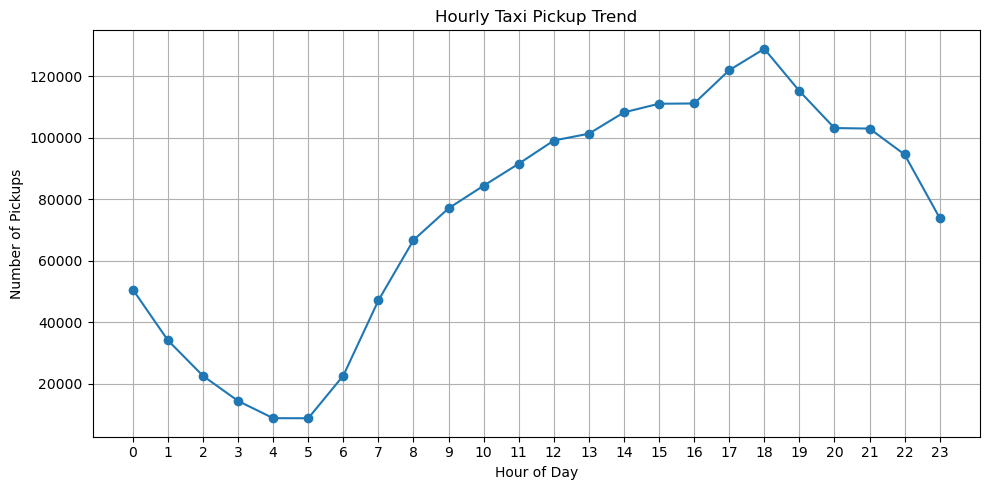

In [187]:
# Find and show the hourly trends in taxi pickups

hourly_trend = df1.groupby('hour').size()

# Plotting the hourly pickup trend
plt.figure(figsize=(10, 5))
plt.plot(hourly_trend.index, hourly_trend.values, marker='o')
plt.title('Hourly Taxi Pickup Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()



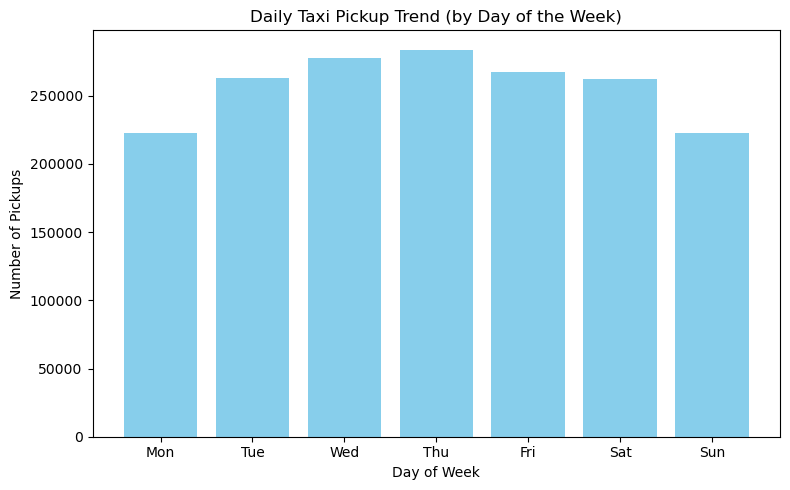

In [189]:
# Find and show the daily trends in taxi pickups (days of the week)


# Convert pickup datetime to datetime if not already
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Extract day of week (0=Monday, 6=Sunday)
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek

# Map numeric days to names
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df1['day_name'] = df1['day_of_week'].map(day_map)

# Group by day name and count pickups
daily_trend = df1['day_name'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot the trend
plt.figure(figsize=(8, 5))
plt.bar(daily_trend.index, daily_trend.values, color='skyblue')
plt.title('Daily Taxi Pickup Trend (by Day of the Week)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()



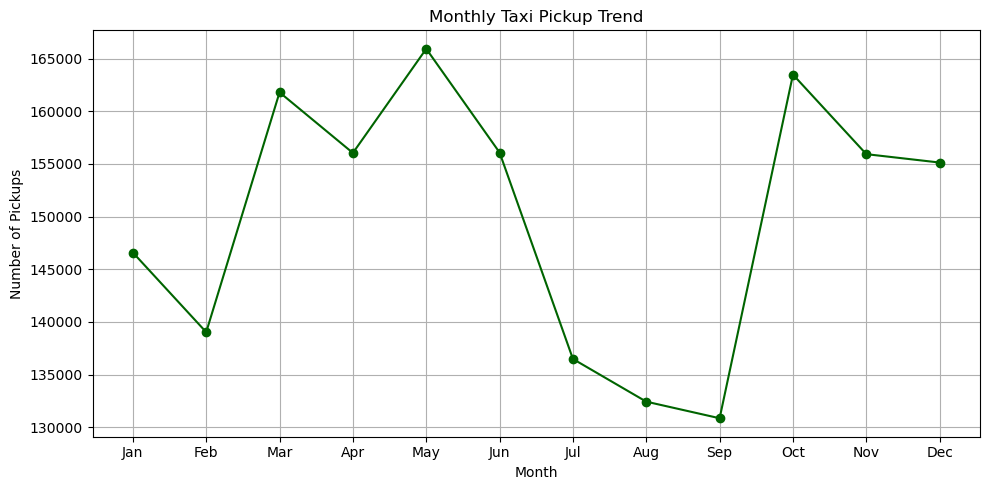

In [191]:
# Show the monthly trends in pickups

# Extract month from pickup datetime
df1['month'] = df1['tpep_pickup_datetime'].dt.month

# Map month numbers to names (optional for better readability)
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df1['month_name'] = df1['month'].map(month_map)

# Group by month and count pickups
monthly_trend = df1['month_name'].value_counts().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
).dropna()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', color='darkgreen')
plt.title('Monthly Taxi Pickup Trend')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [193]:
# Analyse the above parameters
# List of financial and distance-related columns
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check for zero or negative values in each column
for col in cols_to_check:
    zero_count = (df1[col] == 0).sum()
    negative_count = (df1[col] < 0).sum()
    print(f"{col}: {zero_count} zeros, {negative_count} negative values")



fare_amount: 0 zeros, 0 negative values
tip_amount: 381810 zeros, 0 negative values
total_amount: 0 zeros, 0 negative values
trip_distance: 0 zeros, 0 negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [195]:
# Create a df with non zero entries for the selected parameters.

# Define the financial columns to filter (excluding trip_distance)
financial_cols = ['fare_amount', 'tip_amount', 'total_amount']

# Create new DataFrame with non-zero financial values only
df_clean = df1[(df1[financial_cols] > 0).all(axis=1)]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [197]:
# Group data by month and analyse monthly revenue

# Ensure datetime column is in correct format
df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])

# Extract month and year (optional: useful if your data spans multiple years)
df_clean['month'] = df_clean['tpep_pickup_datetime'].dt.to_period('M')

# Group by month and sum the total_amount (revenue)
monthly_revenue = df_clean.groupby('month')['total_amount'].sum()

# Convert to DataFrame (optional, for easy viewing)
monthly_revenue_df = monthly_revenue.reset_index()
monthly_revenue_df.columns = ['Month', 'Total_Revenue']

# Display it
print(monthly_revenue_df)


      Month  Total_Revenue
0   2022-12          12.96
1   2023-01     2915173.79
2   2023-02     2808728.69
3   2023-03     3341661.58
4   2023-04     3201112.39
5   2023-05     3520523.79
6   2023-06     3278468.30
7   2023-07     2773609.70
8   2023-08     2671630.74
9   2023-09     2818534.73
10  2023-10     3515129.10
11  2023-11     3351223.54
12  2023-12     3254170.24


/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/669248589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])
/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/669248589.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month'] = df_clean['tpep_pickup_datetime'].dt.to_period('M')


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [199]:
# Calculate proportion of each quarter

# Make sure pickup datetime is in datetime format
df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])

# Extract quarter
df_clean['quarter'] = df_clean['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and sum total_amount (revenue)
quarterly_revenue = df_clean.groupby('quarter')['total_amount'].sum()

# Calculate proportion (as percentages)
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

# Convert to DataFrame for display
quarterly_proportion_df = quarterly_proportion.reset_index()
quarterly_proportion_df.columns = ['Quarter', 'Revenue_Proportion (%)']

# Display the result
print(quarterly_proportion_df)


  Quarter  Revenue_Proportion (%)
0  2022Q4                0.000035
1  2023Q1               24.207127
2  2023Q2               26.702563
3  2023Q3               22.066167
4  2023Q4               27.024108


/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/1425071207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])
/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/1425071207.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['quarter'] = df_clean['tpep_pickup_datetime'].dt.to_period('Q')


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

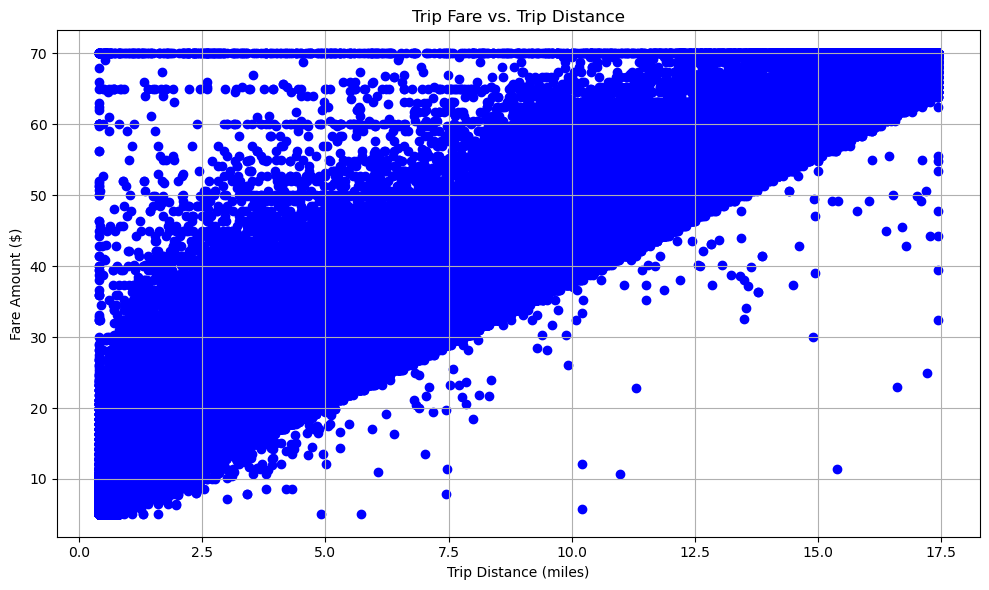

In [207]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['trip_distance'], df_clean['fare_amount'],color='blue')
plt.title('Trip Fare vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

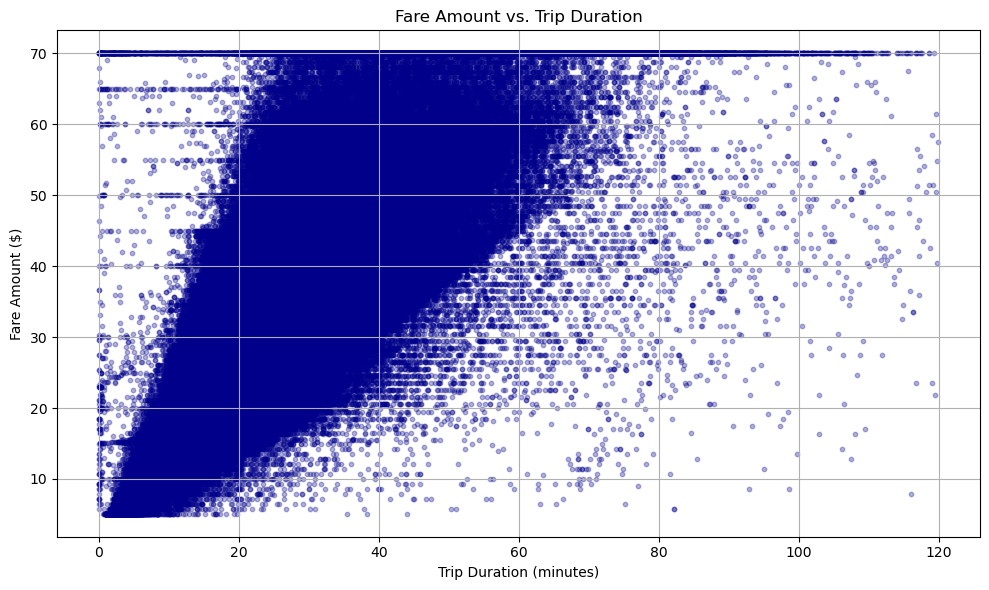

In [215]:
# Show relationship between fare and trip duration

# Ensure datetime columns are in datetime format
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

# Create trip duration in minutes
df1['trip_duration_min'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60



plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['trip_duration_min'], filtered_df['fare_amount'], alpha=0.3, s=10, color='darkblue')
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()



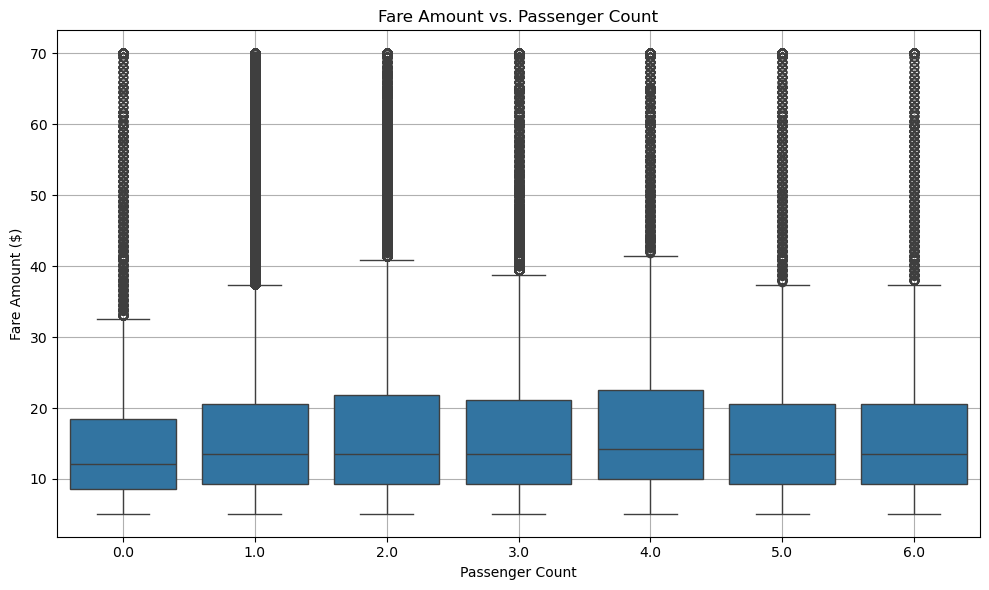

In [219]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df1)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

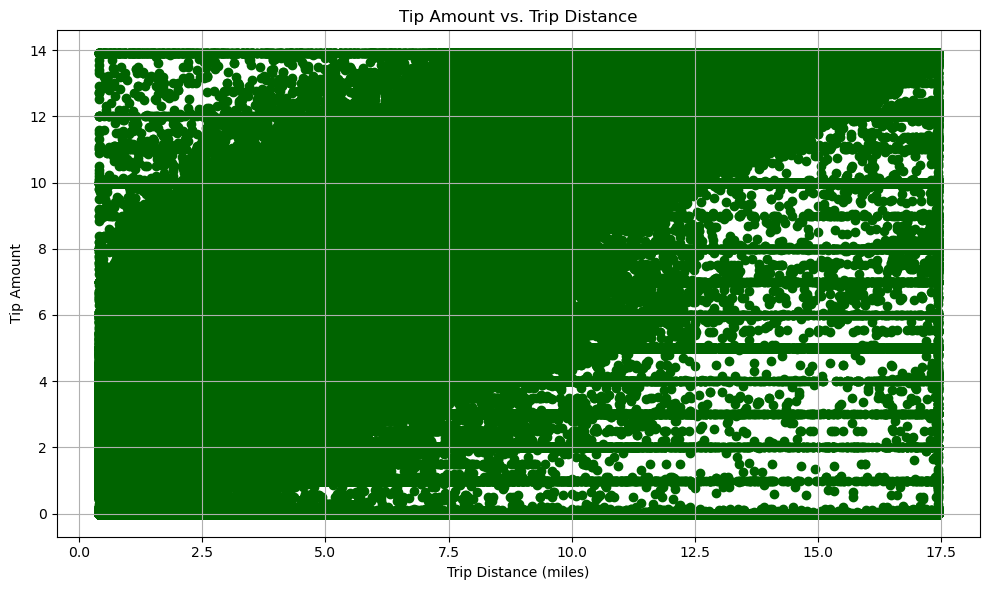

In [223]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
plt.scatter(df1['trip_distance'], df1['tip_amount'], color='darkgreen')
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/486923019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')


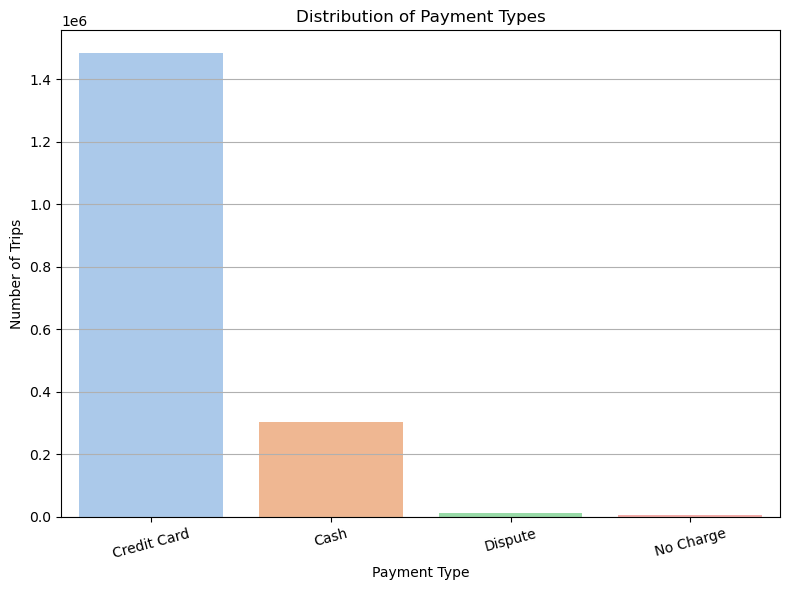

In [229]:
# Analyse the distribution of different payment types (payment_type).



# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [232]:
# !pip install geopandas
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 1.1 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 859.5 kB/s eta 0:00:00a 0:00:01


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [234]:
os.getcwd()

'/Users/mukesh/python/self download'

In [240]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones =gpd.read_file('../Datasets and Dictionary/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

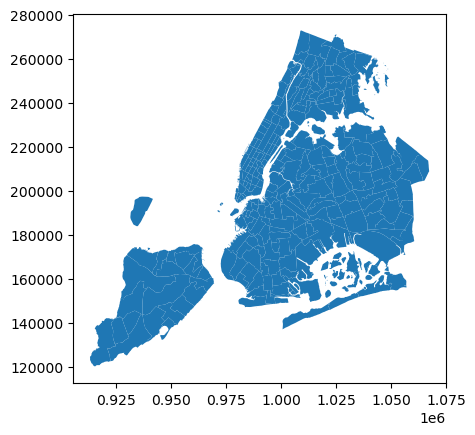

In [242]:
# print(zones.info())
# zones.plot()

print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [244]:
# Merge zones and trip records using locationID and PULocationID

df1_merged = df1.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# View merged data
print(df1_merged[['PULocationID', 'zone', 'borough']].head())

   PULocationID                     zone    borough
0           113  Greenwich Village North  Manhattan
1           209                  Seaport  Manhattan
2           148          Lower East Side  Manhattan
3           231     TriBeCa/Civic Center  Manhattan
4           100         Garment District  Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [246]:
# Group data by location and calculate the number of trips

# Group by pickup zone and count trips
trip_counts = df1_merged.groupby('zone').size().reset_index(name='trip_count')

# Sort in descending order
trip_counts = trip_counts.sort_values(by='trip_count', ascending=False)

# Display top locations
print(trip_counts.head(10))


                             zone  trip_count
221         Upper East Side South       89606
148                Midtown Center       86583
220         Upper East Side North       78528
149                  Midtown East       67050
172  Penn Station/Madison Sq West       65338
130           Lincoln Square East       62222
126             LaGuardia Airport       62216
214     Times Sq/Theatre District       61151
157                   Murray Hill       55728
150                 Midtown North       54667


/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/3510098618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='trip_count', y='zone', data=trip_counts.head(10), palette='magma')


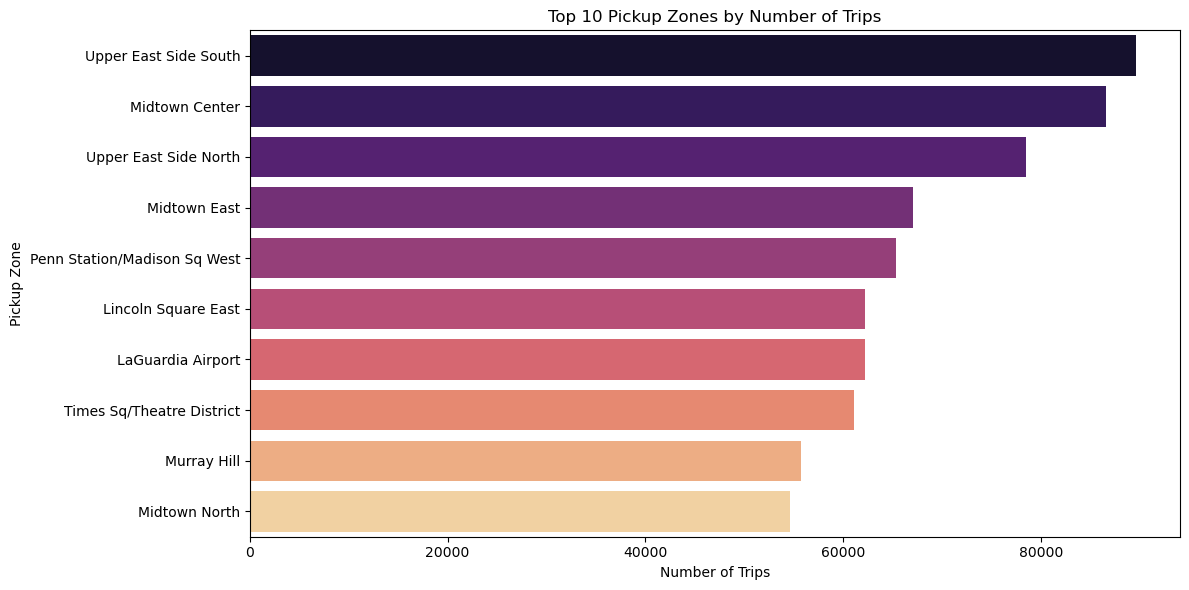

In [248]:
plt.figure(figsize=(12, 6))
sns.barplot(x='trip_count', y='zone', data=trip_counts.head(10), palette='magma')
plt.title('Top 10 Pickup Zones by Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [250]:
# Merge trip counts back to the zones GeoDataFrame
trip_counts = df1_merged.groupby('zone').size().reset_index(name='trip_count')




In [252]:
# Merge trip counts back into the zones GeoDataFrame
zones_with_counts = zones.merge(trip_counts, on='zone', how='left')

# Fill NaN trip counts with 0 (zones that had no pickups)
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0).astype(int)

# Preview
zones_with_counts[['zone', 'trip_count']].head()


zone  trip_count
0           Newark Airport           1
1              Jamaica Bay           1
2  Allerton/Pelham Gardens          30
3            Alphabet City        1831
4            Arden Heights           3

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

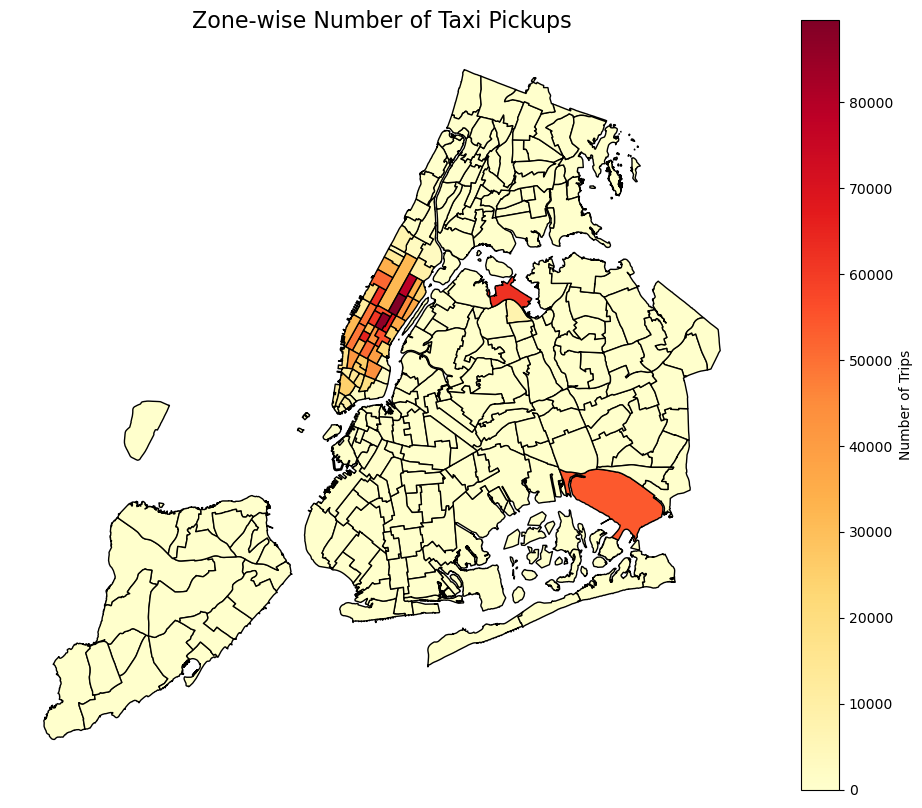

In [254]:

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot GeoDataFrame with trip counts
zones_with_counts.plot(
    column='trip_count',
    ax=ax,
    cmap='YlOrRd',
    legend=True,
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"},
    edgecolor='black'
)

# Add title and hide axis
ax.set_title('Zone-wise Number of Taxi Pickups', fontsize=16)
ax.axis('off')

# Show the plot
plt.show()


In [256]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by trip count in descending order
sorted_zones = zones_with_counts.sort_values(by='trip_count', ascending=False)

# Display the top 10 zones with highest number of trips
sorted_zones[['zone', 'borough', 'trip_count']].head(10)


zone    borough  trip_count
236         Upper East Side South  Manhattan       89606
160                Midtown Center  Manhattan       86583
235         Upper East Side North  Manhattan       78528
161                  Midtown East  Manhattan       67050
185  Penn Station/Madison Sq West  Manhattan       65338
141           Lincoln Square East  Manhattan       62222
137             LaGuardia Airport     Queens       62216
229     Times Sq/Theatre District  Manhattan       61151
169                   Murray Hill  Manhattan       55728
162                 Midtown North  Manhattan       54667

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [258]:
# Find routes which have the slowest speeds at different times of the day
# Step 1: Calculate trip duration in hours
df1['trip_duration_hrs'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Filter to remove trips with 0 or negative duration or distance
df_filtered = df1[(df1['trip_duration_hrs'] > 0) & (df1['trip_distance'] > 0)]

# Step 2: Group by Pickup, Dropoff, Hour
grouped = df_filtered.groupby(['PULocationID', 'DOLocationID', 'hour']).agg({
    'trip_duration_hrs': 'mean',
    'trip_distance': 'mean'
}).reset_index()

# Step 3: Calculate speed (miles per hour)
grouped['avg_speed_mph'] = grouped['trip_distance'] / grouped['trip_duration_hrs']

# Step 4: Sort to find slowest routes
slow_routes = grouped.sort_values(by='avg_speed_mph').head(10)

# Display slowest routes
slow_routes



PULocationID  DOLocationID  hour  trip_duration_hrs  trip_distance  \
88835            213            32    21          59.277778          1.160   
116006           261            87     4          22.908889          0.510   
13958             50           237     1          23.897222          2.350   
32006             97           195    15          23.608333          2.550   
20967             74            43    17          11.965417          1.345   
9936              45           233    22          23.903889          2.780   
62619            145            82     0          23.603889          2.800   
23248             76            72     6          13.936389          1.700   
48078            137            90     3          11.901111          1.525   
70161            161           162     5           4.712833          0.624   

        avg_speed_mph  
88835        0.019569  
116006       0.022262  
13958        0.098338  
32006        0.108013  
20967        0.112407  
9936         0.116299  
62619        0.118625  
23248        0.121983  
48078        0.128139  
70161        0.132404

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/1012587007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='num_trips', data=hourly_trips, palette='viridis')


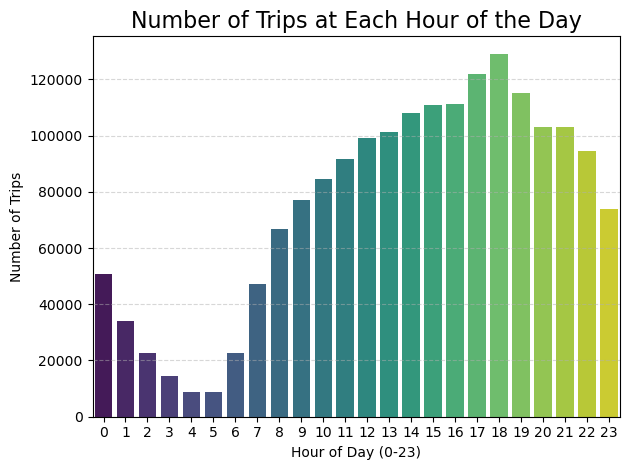

In [262]:
# Visualise the number of trips per hour and find the busiest hour
# Count number of trips per hour
hourly_trips = df1.groupby('hour').size().reset_index(name='num_trips')

sns.barplot(x='hour', y='num_trips', data=hourly_trips, palette='viridis')

plt.title('Number of Trips at Each Hour of the Day', fontsize=16)
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.


Find the actual number of trips in the five busiest hours -> 6pm

In [264]:
# Define your sample fraction — replace with your actual sampling rate
sample_fraction = 0.05  # If you sampled 5% of the data

# Scale up the number of trips per hour
hourly_trips['scaled_num_trips'] = (hourly_trips['num_trips'] / sample_fraction).round().astype(int)

# View scaled results
hourly_trips.head()



hour  num_trips  scaled_num_trips
0     0      50624           1012480
1     1      34115            682300
2     2      22579            451580
3     3      14429            288580
4     4       8840            176800

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [266]:
# Compare traffic trends for the week days and weekends

# Extract day of week from pickup datetime (0 = Monday, 6 = Sunday)
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek

# Create a new column to label weekday vs weekend
df1['day_type'] = df1['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [268]:
# Count number of trips for each hour split by weekday/weekend
trends = df1.groupby(['day_type', 'hour']).size().reset_index(name='num_trips')


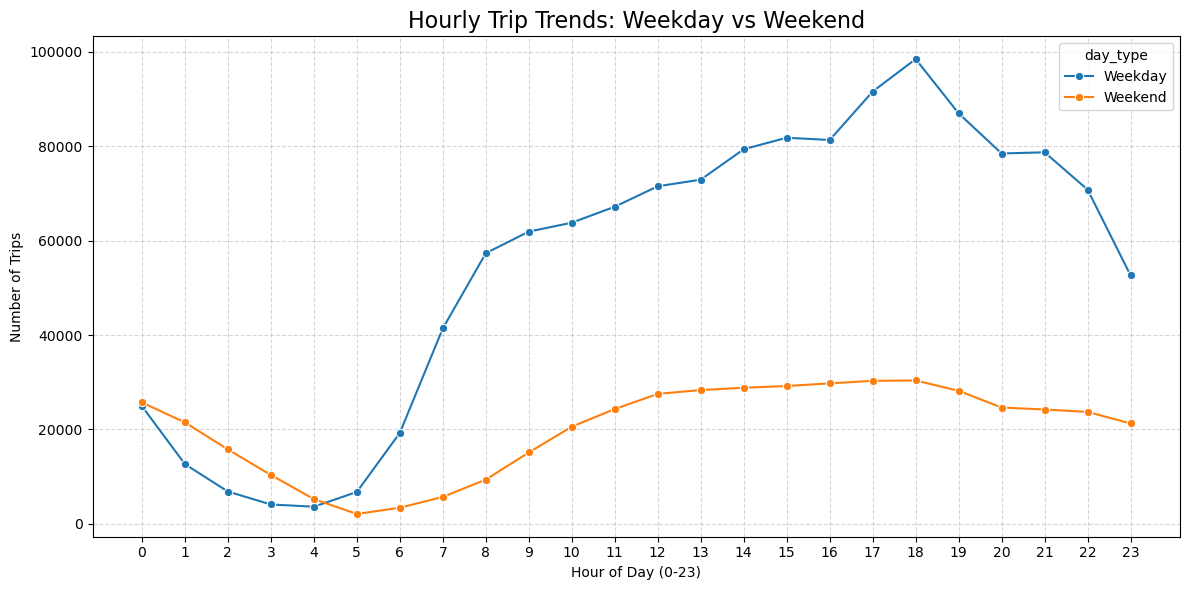

In [270]:


plt.figure(figsize=(12,6))
sns.lineplot(data=trends, x='hour', y='num_trips', hue='day_type', marker='o')

plt.title('Hourly Trip Trends: Weekday vs Weekend', fontsize=16)
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [276]:
# Find top 10 pickup and dropoff zones
# Count top pickup zones
top_pickups = df1['PULocationID'].value_counts().reset_index()
top_pickups.columns = ['LocationID', 'num_pickups']

# Merge with zones to get zone names
top_pickups = top_pickups.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 pickup zones")
# Display top 10
top_pickups.head(10)





Top 10 pickup zones


LocationID  num_pickups                          zone
0         237        89606         Upper East Side South
1         161        86583                Midtown Center
2         236        78528         Upper East Side North
3         162        67050                  Midtown East
4         186        65338  Penn Station/Madison Sq West
5         142        62222           Lincoln Square East
6         138        62216             LaGuardia Airport
7         230        61151     Times Sq/Theatre District
8         170        55728                   Murray Hill
9         163        54667                 Midtown North

In [278]:
# Count top dropoff zones
top_dropoffs = df1['DOLocationID'].value_counts().reset_index()
top_dropoffs.columns = ['LocationID', 'num_dropoffs']

# Merge with zones to get zone names
top_dropoffs = top_dropoffs.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 dropoff zones")
# Display top 10
top_dropoffs.head(10)


Top 10 dropoff zones


LocationID  num_dropoffs                       zone
0         236         82690      Upper East Side North
1         237         79552      Upper East Side South
2         161         72239             Midtown Center
3         170         54881                Murray Hill
4         230         54711  Times Sq/Theatre District
5         162         52584               Midtown East
6         142         52232        Lincoln Square East
7         239         51414      Upper West Side South
8         141         48820            Lenox Hill West
9          68         46812               East Chelsea

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [280]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count pickups and dropoffs
pickup_counts = df1['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'num_pickups']

dropoff_counts = df1['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'num_dropoffs']

# Merge counts together
pickup_dropoff = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)

# Calculate pickup/dropoff ratio
pickup_dropoff['pickup_dropoff_ratio'] = pickup_dropoff['num_pickups'] / (pickup_dropoff['num_dropoffs'] + 1e-6)

# Merge with zones for zone names
pickup_dropoff = pickup_dropoff.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Optional: Filter out low-traffic zones (to avoid noise)
pickup_dropoff['total_trips'] = pickup_dropoff['num_pickups'] + pickup_dropoff['num_dropoffs']
filtered = pickup_dropoff[pickup_dropoff['total_trips'] > 100]  # adjust threshold as needed

# Top 10 ratios
top10_ratios = filtered.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# Bottom 10 ratios
bottom10_ratios = filtered.sort_values(by='pickup_dropoff_ratio').head(10)


print("Top 10 pickup/dropoff ratio zones:")
print(top10_ratios[['zone', 'pickup_dropoff_ratio', 'num_pickups', 'num_dropoffs']])

print("\nBottom 10 pickup/dropoff ratio zones:")
print(bottom10_ratios[['zone', 'pickup_dropoff_ratio', 'num_pickups', 'num_dropoffs']])



Top 10 pickup/dropoff ratio zones:
                             zone  pickup_dropoff_ratio  num_pickups  \
70                  East Elmhurst              9.311703       8036.0   
128                   JFK Airport              5.775360      54144.0   
134             LaGuardia Airport              2.951703      62216.0   
181  Penn Station/Madison Sq West              1.606501      65338.0   
110       Greenwich Village South              1.401011      24938.0   
42                   Central Park              1.381344      31706.0   
243                  West Village              1.359356      41773.0   
157                  Midtown East              1.275103      67050.0   
100              Garment District              1.213778      30728.0   
156                Midtown Center              1.198563      86583.0   

     num_dropoffs  
70          863.0  
128        9375.0  
134       21078.0  
181       40671.0  
110       17800.0  
42        22953.0  
243       30730.0  
157       52

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [282]:
# Filter for night hours (11 PM to 5 AM)
# Filter for night hours (23:00 to 05:00)
night_df = df1[(df1['hour'] >= 23) | (df1['hour'] <= 5)]

# Top 10 pickup zones during night hours
night_pickups = night_df['PULocationID'].value_counts().reset_index()
night_pickups.columns = ['LocationID', 'night_pickups']
night_pickups = night_pickups.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
top_night_pickups = night_pickups.head(10)

# Top 10 dropoff zones during night hours
night_dropoffs = night_df['DOLocationID'].value_counts().reset_index()
night_dropoffs.columns = ['LocationID', 'night_dropoffs']
night_dropoffs = night_dropoffs.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
top_night_dropoffs = night_dropoffs.head(10)

print("Top 10 Nighttime Pickup Zones:")
print(top_night_pickups[['zone', 'night_pickups']])

print("\nTop 10 Nighttime Dropoff Zones:")
print(top_night_dropoffs[['zone', 'night_dropoffs']])


Top 10 Nighttime Pickup Zones:
                           zone  night_pickups
0                  East Village          15938
1                  West Village          12942
2                  Clinton East          10483
3               Lower East Side          10065
4                   JFK Airport           9266
5       Greenwich Village South           8995
6     Times Sq/Theatre District           8341
7  Penn Station/Madison Sq West           7187
8                 Midtown South           6261
9                  East Chelsea           6176

Top 10 Nighttime Dropoff Zones:
                            zone  night_dropoffs
0                   East Village            8537
1                   Clinton East            6809
2                    Murray Hill            6287
3                       Gramercy            5826
4                   East Chelsea            5796
5                Lenox Hill West            5223
6                 Yorkville West            5211
7                   West Vi

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [286]:
# Analyse the fare per mile per passenger for different passenger counts
# Avoid division by zero
df1_filtered = df1[(df1['trip_distance'] > 0) & (df1['passenger_count'] > 0)]

# Calculate fare per mile per passenger
df1_filtered['fare_per_mile_per_passenger'] = df1_filtered['fare_amount'] / (df1_filtered['trip_distance'] * df1_filtered['passenger_count'])

# Group by passenger count and compute mean fare per mile per passenger
fare_analysis = df1_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Sort by passenger count for better readability
fare_analysis = fare_analysis.sort_values('passenger_count')

# Display
print(fare_analysis)





   passenger_count  fare_per_mile_per_passenger
0              1.0                     7.839757
1              2.0                     3.888855
2              3.0                     2.615773
3              4.0                     1.972602
4              5.0                     1.526023
5              6.0                     1.293405


/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/2615740728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['fare_per_mile_per_passenger'] = df1_filtered['fare_amount'] / (df1_filtered['trip_distance'] * df1_filtered['passenger_count'])


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [288]:
# Compare the average fare per mile for different days and for different times of the day
# Filter valid trips to avoid division by zero
df1_valid = df1[df1['trip_distance'] > 0].copy()

# Create day column
df1_valid['day_of_week'] = df1_valid['tpep_pickup_datetime'].dt.day_name()

# Calculate fare per mile
df1_valid['fare_per_mile'] = df1_valid['fare_amount'] / df1_valid['trip_distance']

# Group by day and calculate mean fare per mile
fare_by_day = df1_valid.groupby('day_of_week')['fare_per_mile'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Display
print(fare_by_day)

# Group by hour
fare_by_hour = df1_valid.groupby('hour')['fare_per_mile'].mean()

# Display
print(fare_by_hour)



day_of_week
Monday       7.528458
Tuesday      8.093732
Wednesday    8.204448
Thursday     8.152178
Friday       7.873955
Saturday     7.679405
Sunday       7.089355
Name: fare_per_mile, dtype: float64
hour
0     6.533907
1     6.451990
2     6.404206
3     6.234563
4     6.112821
5     6.028163
6     6.329691
7     6.998509
8     7.716850
9     8.021019
10    8.134187
11    8.470535
12    8.585718
13    8.527780
14    8.453685
15    8.533609
16    8.469107
17    8.468624
18    8.244191
19    7.870212
20    7.271458
21    7.053337
22    6.889485
23    6.665359
Name: fare_per_mile, dtype: float64


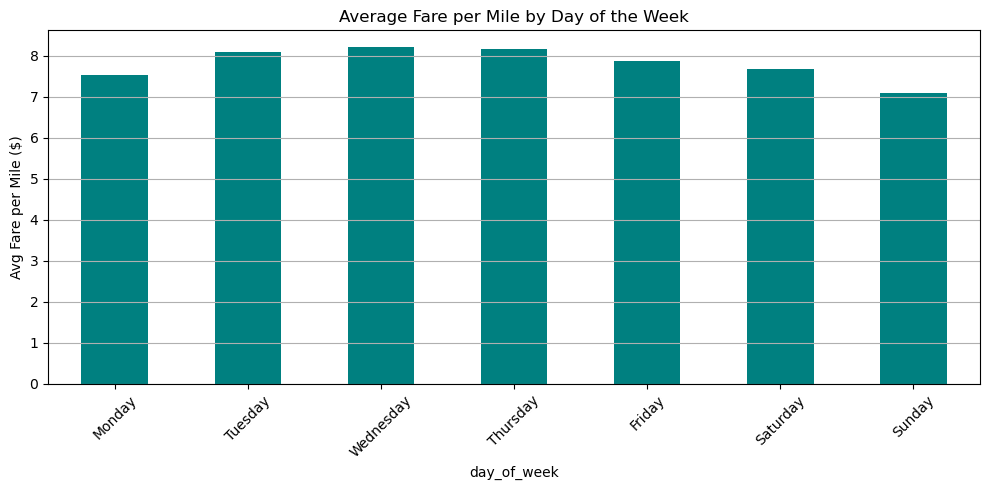

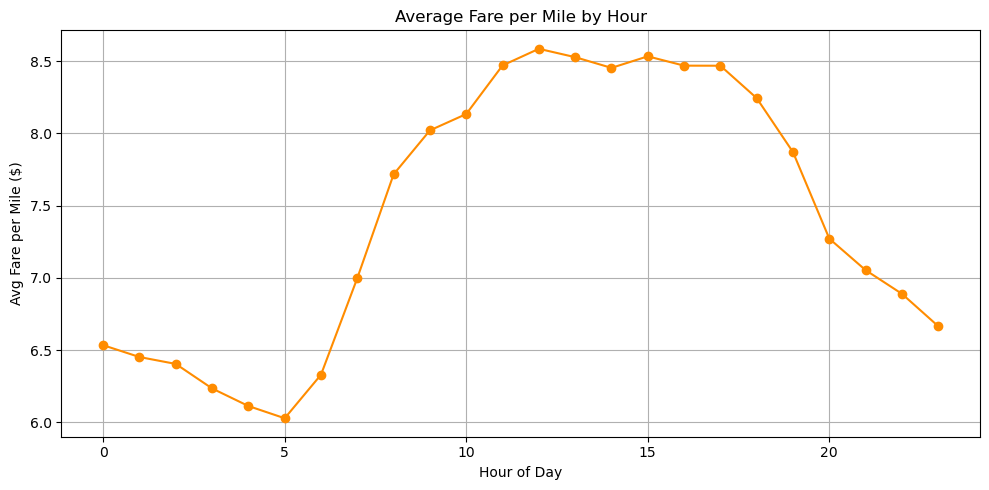

In [290]:


# Plot by day
plt.figure(figsize=(10, 5))
fare_by_day.plot(kind='bar', color='teal')
plt.ylabel('Avg Fare per Mile ($)')
plt.title('Average Fare per Mile by Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot by hour
plt.figure(figsize=(10, 5))
fare_by_hour.plot(kind='line', marker='o', color='darkorange')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Fare per Mile ($)')
plt.title('Average Fare per Mile by Hour')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

   VendorID  fare_per_mile
0         1       7.869566
1         2       7.819692


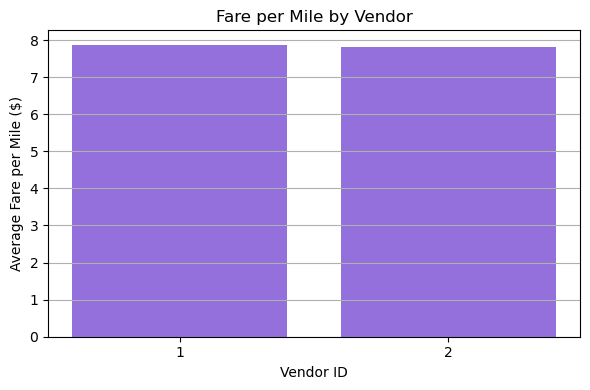

In [294]:
# Compare fare per mile for different vendors

# Filter valid rows
df1_valid = df1[df1['trip_distance'] > 0].copy()

# Compute fare per mile
df1_valid['fare_per_mile'] = df1_valid['fare_amount'] / df1_valid['trip_distance']

# Group by VendorID
fare_by_vendor = df1_valid.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Display result
print(fare_by_vendor)


plt.figure(figsize=(6, 4))
plt.bar(fare_by_vendor['VendorID'].astype(str), fare_by_vendor['fare_per_mile'], color='mediumpurple')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.title('Fare per Mile by Vendor')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


   VendorID distance_tier  fare_per_mile
0         1     0–2 miles       9.324649
1         1     2–5 miles       6.382636
2         1      >5 miles       4.518467
3         2     0–2 miles       9.321202
4         2     2–5 miles       6.537769
5         2      >5 miles       4.614188


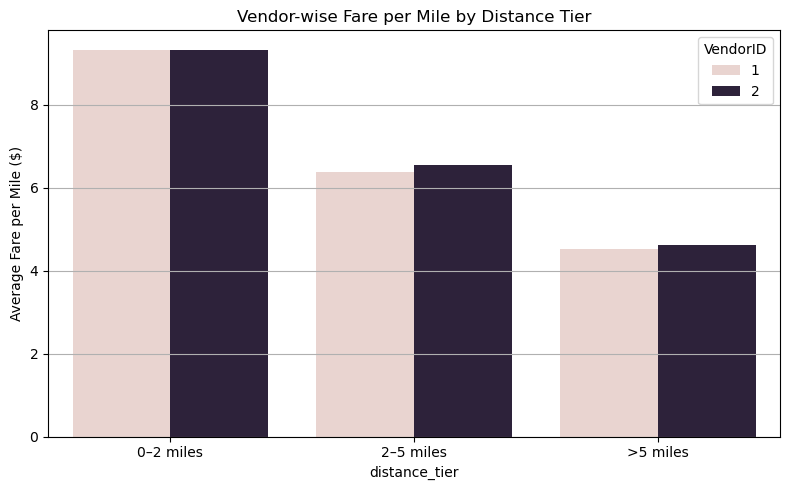

In [296]:
# Defining distance tiers

# Step 1: Filter valid trips
df1_valid = df1[df1['trip_distance'] > 0].copy()

# Step 2: Calculate fare per mile
df1_valid['fare_per_mile'] = df1_valid['fare_amount'] / df1_valid['trip_distance']

# Step 3: Create distance tiers
def assign_tier(dist):
    if dist <= 2:
        return '0–2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '>5 miles'

df1_valid['distance_tier'] = df1_valid['trip_distance'].apply(assign_tier)

# Step 4: Group by VendorID and distance tier
tiered_fare = df1_valid.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Display the result
print(tiered_fare)


plt.figure(figsize=(8, 5))
sns.barplot(data=tiered_fare, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.ylabel('Average Fare per Mile ($)')
plt.title('Vendor-wise Fare per Mile by Distance Tier')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [310]:
#  Analyze tip percentages based on distances, passenger counts and pickup times


# Drop NaN or negative distances
df1_valid = df1_valid[df1_valid['trip_distance'] > 0]

# Recalculate max safely
max_distance = df1_valid['trip_distance'].max()

# Define bins, ensuring the last bin edge is strictly greater than 20
last_bin = max(21, int(max_distance) + 1)
bins = [0, 2, 5, 10, 20, last_bin]
labels = ['0–2', '2–5', '5–10', '10–20', '>20']

# Cut the distances into bins
df1_valid['distance_bin'] = pd.cut(df1_valid['trip_distance'], bins=bins, labels=labels, include_lowest=True)




/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/588418133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = df1_valid.groupby('distance_bin')['tip_percent'].mean().reset_index()
/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/588418133.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_by_distance, x='distance_bin', y='tip_percent', palette='Blues_d')


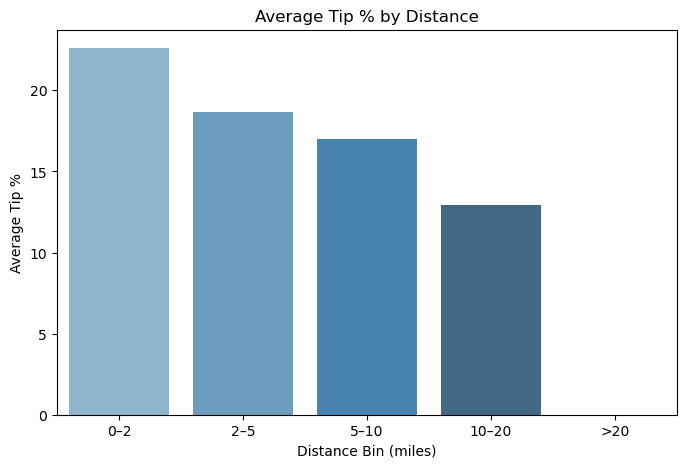

In [312]:
tip_by_distance = df1_valid.groupby('distance_bin')['tip_percent'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_distance, x='distance_bin', y='tip_percent', palette='Blues_d')
plt.title('Average Tip % by Distance')
plt.xlabel('Distance Bin (miles)')
plt.ylabel('Average Tip %')
plt.show()


/var/folders/v1/p_rwbx417bs3q29_sds7w6sm0000gn/T/ipykernel_99433/1420498757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percent', palette='Greens_d')


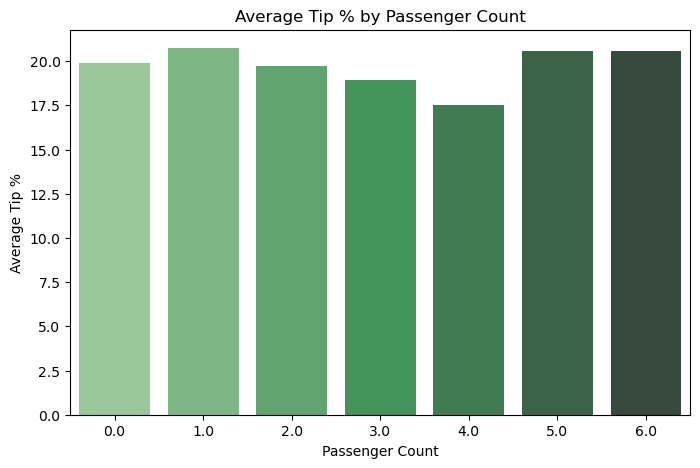

In [314]:
tip_by_passenger = df1_valid.groupby('passenger_count')['tip_percent'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percent', palette='Greens_d')
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip %')
plt.show()


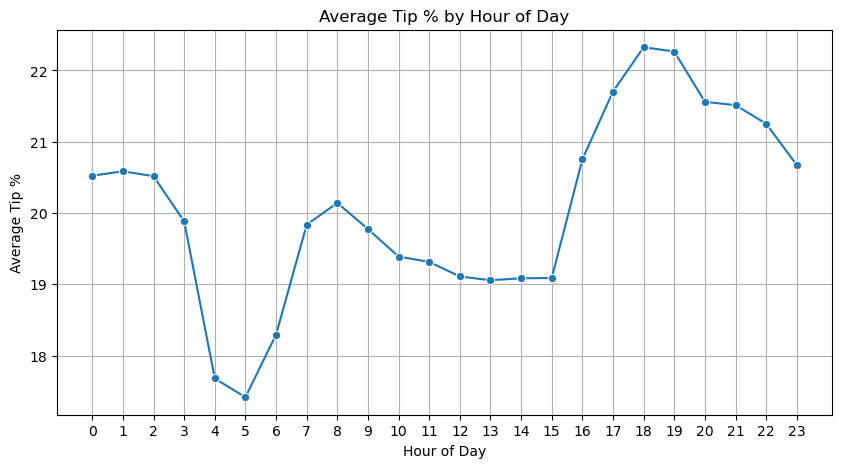

In [316]:
tip_by_hour = df1_valid.groupby('hour')['tip_percent'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=tip_by_hour, x='hour', y='tip_percent', marker='o')
plt.title('Average Tip % by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip %')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [318]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Create two subsets of the data
low_tip_df = df1_valid[df1_valid['tip_percent'] < 10]
high_tip_df = df1_valid[df1_valid['tip_percent'] > 25]

# Compare average values of key columns
comparison = pd.DataFrame({
    'Low Tip (<10%)': low_tip_df[['fare_amount', 'trip_distance', 'passenger_count', 'hour']].mean(),
    'High Tip (>25%)': high_tip_df[['fare_amount', 'trip_distance', 'passenger_count', 'hour']].mean()
})

print("Comparison of key features for low and high tip percentage trips:")
display(comparison)


Comparison of key features for low and high tip percentage trips:


Low Tip (<10%)  High Tip (>25%)
fare_amount           20.084637        13.371235
trip_distance          3.528294         2.034643
passenger_count        1.414962         1.346668
hour                  13.978006        14.624679

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

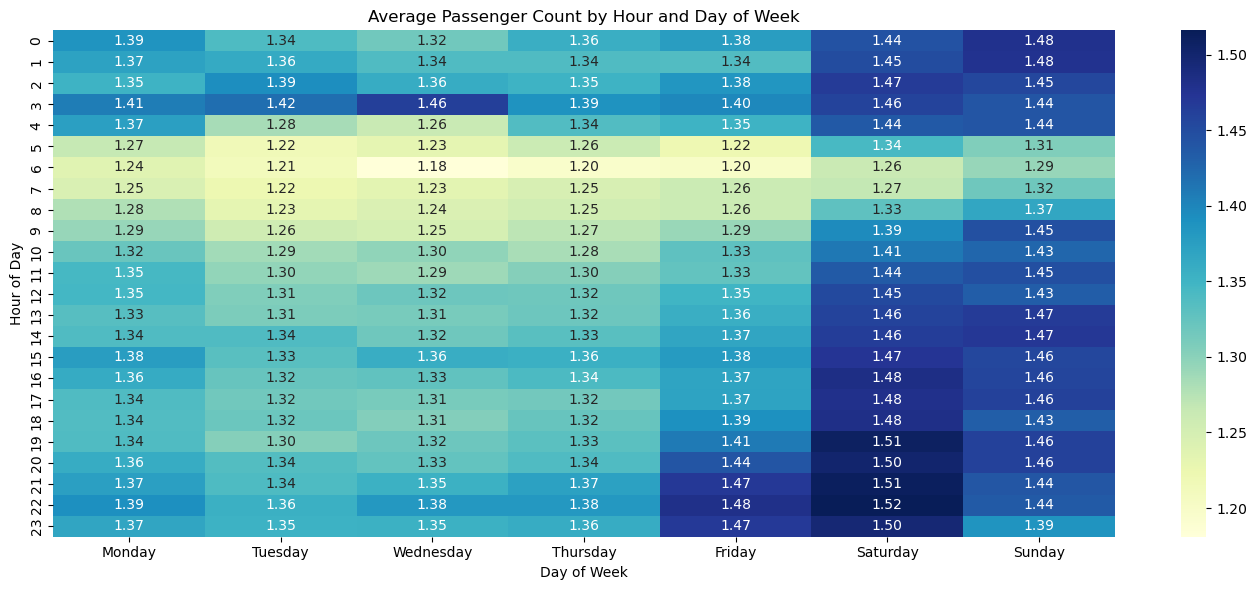

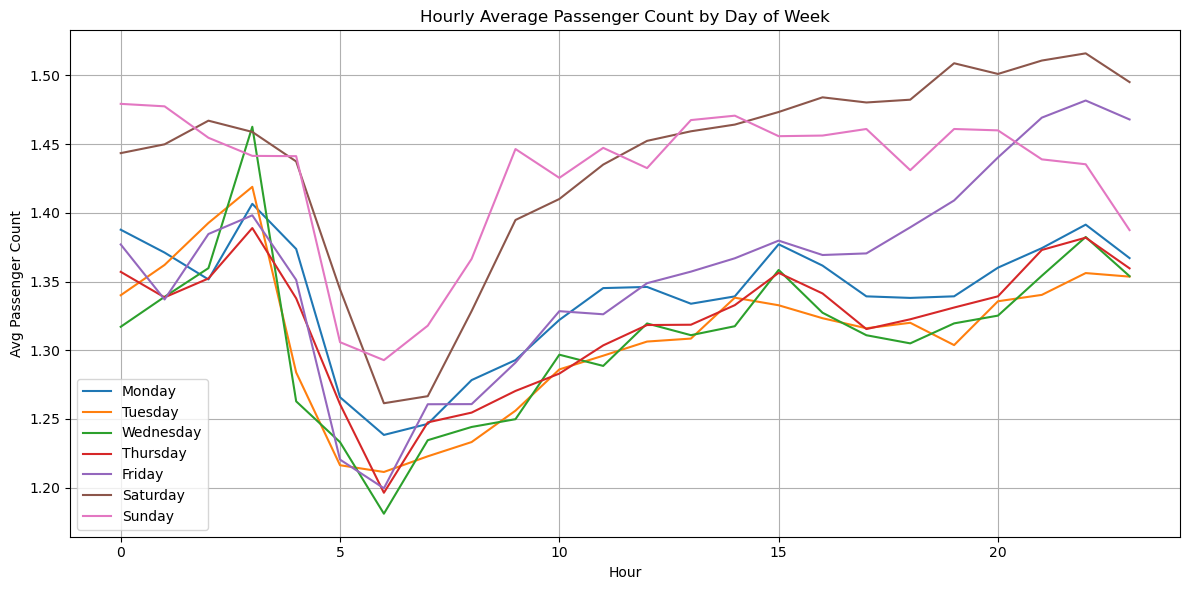

In [320]:
# See how passenger count varies across hours and days

# Group by hour and day of the week to calculate mean passenger count
df1_valid['day_of_week'] = pd.to_datetime(df1_valid['date']).dt.day_name()
passenger_by_hour_day = df1_valid.groupby(['hour', 'day_of_week'])['passenger_count'].mean().unstack()
# Ensure correct order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_by_hour_day = passenger_by_hour_day[day_order]
plt.figure(figsize=(14, 6))
sns.heatmap(passenger_by_hour_day, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Average Passenger Count by Hour and Day of Week")
plt.ylabel("Hour of Day")
plt.xlabel("Day of Week")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
for day in day_order:
    plt.plot(passenger_by_hour_day.index, passenger_by_hour_day[day], label=day)
    
plt.title("Hourly Average Passenger Count by Day of Week")
plt.xlabel("Hour")
plt.ylabel("Avg Passenger Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

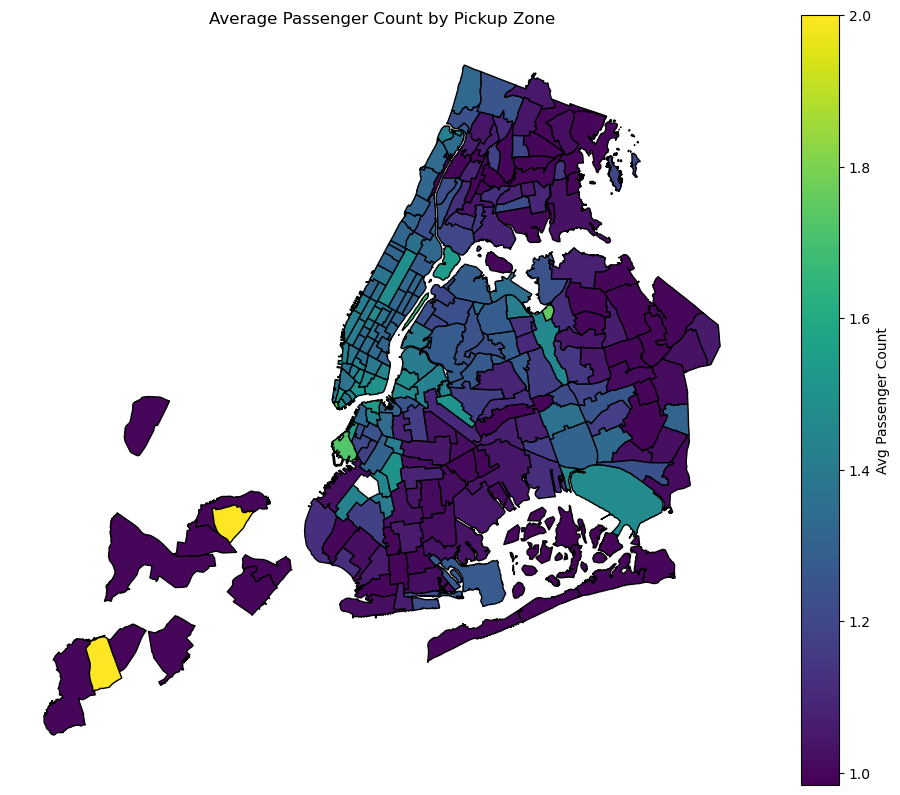

In [322]:
# How does passenger count vary across zones

# Group by pickup location and calculate average passenger count
passenger_by_zone = df1_valid.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zone names from zones GeoDataFrame
zone_passenger = pd.merge(zones, passenger_by_zone, left_on='LocationID', right_on='PULocationID')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zone_passenger.plot(column='passenger_count', ax=ax, legend=True,
                    legend_kwds={'label': "Avg Passenger Count", 'orientation': "vertical"},
                    cmap='viridis', edgecolor='black')
plt.title("Average Passenger Count by Pickup Zone")
plt.axis('off')
plt.show()


In [328]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
#Group by pickup location and calculate average passenger count
avg_passenger_per_zone = df1_valid.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_per_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merge with zone shapefile GeoDataFrame
zones_with_trips = zones.merge(avg_passenger_per_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Preview result
zones_with_trips[['LocationID', 'zone', 'avg_passenger_count']].head()



LocationID                     zone  avg_passenger_count
0           1           Newark Airport             1.000000
1           2              Jamaica Bay             1.000000
2           3  Allerton/Pelham Gardens             1.000000
3           4            Alphabet City             1.442381
4           5            Arden Heights             1.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

                       applied_count  applied_pct
improvement_surcharge      1799807.0       100.00
mta_tax                    1797305.0        99.86
congestion_surcharge       1697159.0        94.30
extra                      1135762.0        63.10
Airport_fee                 118983.0         6.61


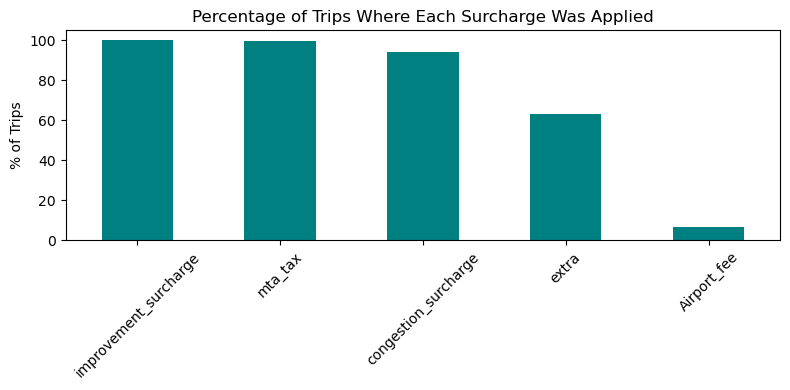

In [331]:
# How often is each surcharge applied?


# List of surcharge-related columns
surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

# Calculate how often each charge is applied (non-zero count and proportion)
surcharge_summary = {}
total_rows = len(df1_valid)

for col in surcharge_columns:
    applied_count = (df1_valid[col] > 0).sum()
    surcharge_summary[col] = {
        'applied_count': applied_count,
        'applied_pct': round((applied_count / total_rows) * 100, 2)
    }

# Convert to DataFrame
surcharge_df = pd.DataFrame(surcharge_summary).T.sort_values(by='applied_pct', ascending=False)
print(surcharge_df)

# Optional: Visualize
surcharge_df['applied_pct'].plot(kind='bar', figsize=(8, 4), color='teal')
plt.title('Percentage of Trips Where Each Surcharge Was Applied')
plt.ylabel('% of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Shift Cabs with the Clock: Demand peaks at predictable hours — align driver shifts accordingly to cover rush hours efficiently.

Zone-Based Rebalancing: Regularly shift idle cabs toward hotspots like airports and entertainment districts using real-time trip data.

Avoid Known Slow Routes: Use historical speed data to reroute around bottlenecks, especially during peak hours.

Match Vehicle Size to Party Size: Most trips are 1–2 passengers. Save larger vehicles for when they’re really needed.

Late-Night Focus: Certain areas stay active past midnight — dedicate a lean night fleet to serve those zones.

Use Tip Trends: Trips with higher tips often mean better routes or service. Study those to train and guide drivers.

Monitor Fare Efficiency: Keep an eye on fare-per-mile, especially on short trips, to flag any inconsistencies or overcharging.

Forecast Demand Spikes: Use past trends to predict where and when surges will hit — prep the fleet in advance.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Follow the Flow: Position more cabs in zones with consistently high pickups during morning and evening peaks.

Weekend Rebalancing: Entertainment and nightlife zones heat up on weekends — shift availability accordingly.

Zone-Level Micro-Targeting: Use high-resolution trip trends to identify under-served but high-demand micro-zones.

Event-Based Deployments: Keep flexible units ready to cover spikes near stadiums, theaters, or transit hubs.

Monthly Seasonality: Boost coverage in tourist-heavy areas during peak travel months (e.g., December, summer).

Off-Hour Optimization: Late-night activity clusters around fewer zones — concentrate limited night fleets there.

Tip & Fare Data Clues: Zones with better fare-per-mile and higher tip percentages are likely your most valuable — prioritize them.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.